In [58]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [59]:
df1 = pd.read_csv('amazon_reviews.csv', dtype={'column_name': str}, low_memory=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67992 entries, 0 to 67991
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            67992 non-null  int64  
 1   id                    67992 non-null  object 
 2   dateAdded             33332 non-null  object 
 3   dateUpdated           33332 non-null  object 
 4   name                  61232 non-null  object 
 5   asins                 67990 non-null  object 
 6   brand                 67992 non-null  object 
 7   categories            67992 non-null  object 
 8   primaryCategories     33332 non-null  object 
 9   imageURLs             33332 non-null  object 
 10  keys                  67992 non-null  object 
 11  manufacturer          67992 non-null  object 
 12  manufacturerNumber    33332 non-null  object 
 13  reviews.date          67953 non-null  object 
 14  reviews.dateAdded     25091 non-null  object 
 15  reviews.dateSeen   

In [60]:
selected_columns = ['reviews.rating', 'reviews.text', 'reviews.title']
df = df1[selected_columns]


In [61]:
df.tail()

,reviews.rating,reviews.text,reviews.title
67987,3.0,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...
67988,1.0,Amazon should include this charger with the Ki...,Should be included
67989,1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger
67990,1.0,I was surprised to find it did not come with a...,Not worth the money
67991,1.0,to spite the fact that i have nothing but good...,as with everyone else


In [62]:
df.isna().sum()

reviews.rating    33
reviews.text       1
reviews.title     19
dtype: int64

In [63]:
df.loc[:, :] = df.dropna()

In [64]:
df.isna().sum()

reviews.rating    53
reviews.text      53
reviews.title     53
dtype: int64

In [65]:
df.duplicated().sum()

20713

In [66]:
df.duplicated().sum()

20713

In [67]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [68]:
df.dtypes

reviews.rating    float64
reviews.text       object
reviews.title      object
dtype: object

In [69]:
df['reviews.rating'].value_counts()

reviews.rating
5.0    32980
4.0    10382
3.0     2073
1.0     1070
2.0      773
Name: count, dtype: int64

In [70]:
import pandas as pd

# Define the classification threshold
threshold = 4

# Create a new column for classification
df['reviews.rating'] = df['reviews.rating'].apply(lambda x: 0 if x < threshold else 1)

# View the updated DataFrame
df.head()

,reviews.rating,reviews.text,reviews.title
0,0,I thought it would be as big as small paper bu...,Too small
1,1,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
2,1,Didnt know how much i'd use a kindle so went f...,Great for the price
3,1,I am 100 happy with my purchase. I caught it o...,A Great Buy
4,1,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids


In [71]:
df['reviews.text'] = df['reviews.text'].astype(str)
df['reviews.title'] = df['reviews.title'].astype(str)

In [72]:
df['reviews.text'] = df['reviews.text'].str.lower()
df['reviews.title'] = df['reviews.title'].str.lower()

In [73]:
df.head()

,reviews.rating,reviews.text,reviews.title
0,0,i thought it would be as big as small paper bu...,too small
1,1,this kindle is light and easy to use especiall...,great light reader. easy to use at the beach
2,1,didnt know how much i'd use a kindle so went f...,great for the price
3,1,i am 100 happy with my purchase. i caught it o...,a great buy
4,1,solid entry level kindle. great for kids. gift...,solid entry-level kindle. great for kids


In [74]:
# Define the remove_punctuation function
def remove_punctuation(text):
    """Custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', string.punctuation))

In [75]:
df["reviews.text"] = df["reviews.text"].apply(lambda text: remove_punctuation(text))
df["reviews.title"] = df["reviews.title"].apply(lambda text: remove_punctuation(text))

In [76]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [77]:
df.columns

Index(['reviews.rating', 'reviews.text', 'reviews.title'], dtype='object')

In [78]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df['reviews.text'] = df['reviews.text'].apply(remove_emoticons)
df['reviews.title'] = df['reviews.title'].apply(remove_emoticons)


In [79]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Apply text preprocessing to the 'reviews.text' column
df['reviews.text'] = df['reviews.text'].apply(lambda x: remove_emoji(x.lower()))

# Apply text preprocessing to the 'reviews.title' column
df['reviews.title'] = df['reviews.title'].apply(lambda x: remove_emoji(x.lower()))

In [80]:
df.head()

,reviews.rating,reviews.text,reviews.title
0,0,i thought it would be as big as small paper bu...,too small
1,1,this kindle is light and easy to use especiall...,great light reader easy to use at the beach
2,1,didnt know how much id use a kindle so went fo...,great for the price
3,1,i am 100 happy with my purchase i caught it on...,a great buy
4,1,solid entry level kindle great for kids gifted...,solid entrylevel kindle great for kids


In [81]:
import nltk
from nltk.tokenize import word_tokenize

comments = df['reviews.text']
comment_text = " ".join(str(comment) for comment in comments)  # Convert all values to strings and concatenate
tokens = word_tokenize(comment_text)

word_count = len(tokens)
print("Total word count:", word_count)

Total word count: 1347287


In [82]:
comment = df['reviews.title']
comment_text = " ".join(str(comment) for comment in comment)  # Convert all values to strings and concatenate
tokens = word_tokenize(comment_text)

word_count = len(tokens)
print("Total word count:", word_count)

Total word count: 167918


In [83]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure nltk resources are downloaded
nltk.download('punkt')

# Tokenize 'reviews.title' column
df['reviews.title'] = df['reviews.title'].apply(lambda x: word_tokenize(x.lower()) if isinstance(x, str) else x)

# Tokenize 'reviews.text' column
df['reviews.text'] = df['reviews.text'].apply(lambda x: word_tokenize(x.lower()) if isinstance(x, str) else x)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [84]:
import nltk
from nltk.corpus import stopwords

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the tokens
def remove_stop_words(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Apply the function to the tokens in the 'reviews.title' column
df['reviews.title'] = df['reviews.title'].apply(remove_stop_words)

# Apply the function to the tokens in the 'reviews.text' column
df['reviews.text'] = df['reviews.text'].apply(remove_stop_words)


In [85]:
df.tail()

,reviews.rating,reviews.text,reviews.title
47274,0,"[appreciably, faster, 18, higher, amp, charger...","[appreciably, faster, 18a, charger]"
47275,0,"[amazon, include, charger, kindle, fact, theyr...",[included]
47276,0,"[love, kindle, fire, really, disappointed, kin...","[disappointing, charger]"
47277,0,"[surprised, find, come, type, charging, cords,...","[worth, money]"
47278,0,"[spite, fact, nothing, good, things, say, amaz...","[everyone, else]"


In [86]:
import nltk
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply the function to the tokens in the 'reviews.title' column
df['reviews.title'] = df['reviews.title'].apply(lemmatize_tokens)

# Apply the function to the tokens in the 'reviews.text' column
df['reviews.text'] = df['reviews.text'].apply(lemmatize_tokens)


In [87]:
import gensim

# Create a Word2Vec model
model = gensim.models.Word2Vec(df['reviews.title'] + df['reviews.text'], min_count=2)


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
X = df[['reviews.text', 'reviews.title']]
y = df['reviews.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert tokenized lists back to text
X_train['reviews.text'] = X_train['reviews.text'].apply(lambda tokens: ' '.join(tokens))
X_train['reviews.title'] = X_train['reviews.title'].apply(lambda tokens: ' '.join(tokens))

# Apply the same conversion to the test set
X_test['reviews.text'] = X_test['reviews.text'].apply(lambda tokens: ' '.join(tokens))
X_test['reviews.title'] = X_test['reviews.title'].apply(lambda tokens: ' '.join(tokens))

# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'reviews.text' column in the training data
X_train_text = vectorizer.fit_transform(X_train['reviews.text'])

# Transform the 'reviews.text' column in the test data
X_test_text = vectorizer.transform(X_test['reviews.text'])

# Fit and transform the 'reviews.title' column in the training data
X_train_title = vectorizer.fit_transform(X_train['reviews.title'])

# Transform the 'reviews.title' column in the test data
X_test_title = vectorizer.transform(X_test['reviews.title'])

# Concatenate the text and title features
X_train_combined = hstack([X_train_text, X_train_title])
X_test_combined = hstack([X_test_text, X_test_title])

logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
support_vector_machine = SVC()

logistic_regression.fit(X_train_combined, y_train)
decision_tree.fit(X_train_combined, y_train)
random_forest.fit(X_train_combined, y_train)
support_vector_machine.fit(X_train_combined, y_train)


SVC()

In [92]:
y_pred_logistic_regression = logistic_regression.predict(X_test_combined)
y_pred_decision_tree = decision_tree.predict(X_test_combined)
y_pred_random_forest = random_forest.predict(X_test_combined)
y_pred_support_vector_machine = support_vector_machine.predict(X_test_combined)

In [93]:
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_support_vector_machine = accuracy_score(y_test, y_pred_support_vector_machine)

In [95]:
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
cm_support_vector_machine = confusion_matrix(y_test, y_pred_support_vector_machine)

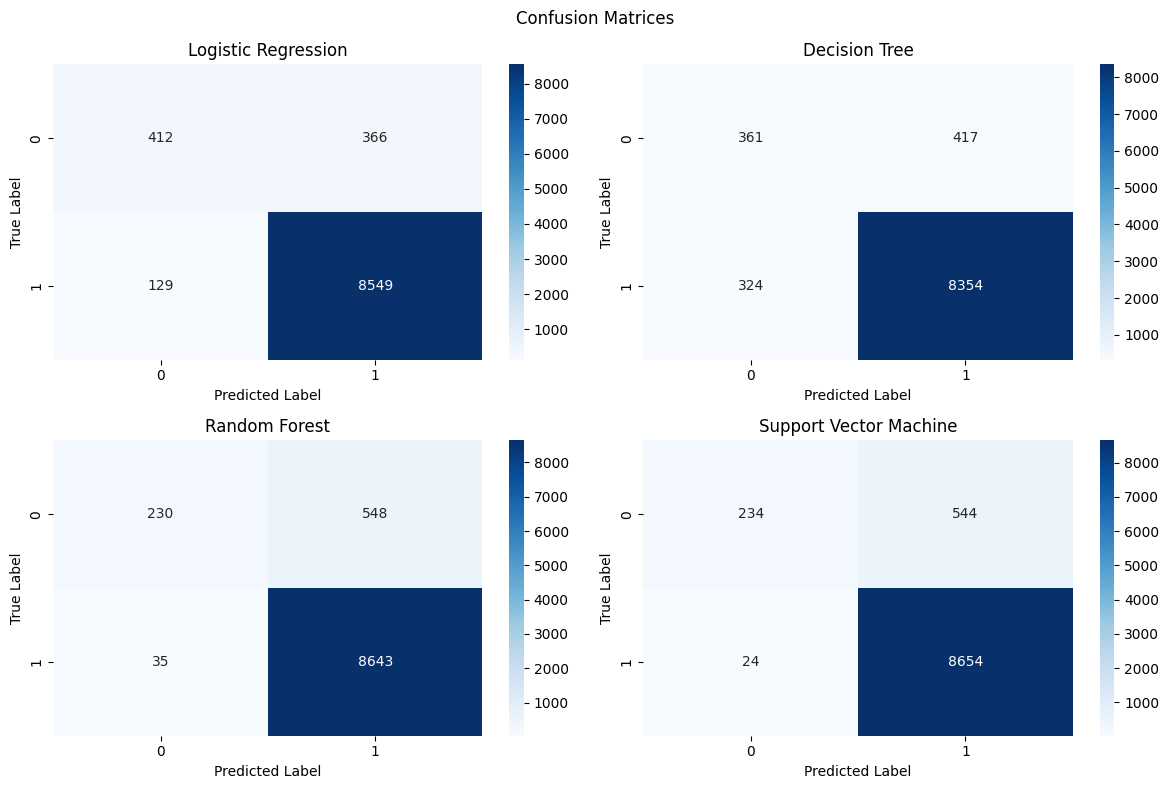

Accuracy Scores:
Logistic Regression: 0.9476522842639594
Decision Tree: 0.9216370558375635
Random Forest: 0.9383460236886633
Support Vector Machine: 0.939932318104907


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
accuracies = [accuracy_logistic_regression, accuracy_decision_tree, accuracy_random_forest, accuracy_support_vector_machine]
cms = [cm_logistic_regression, cm_decision_tree, cm_random_forest, cm_support_vector_machine]

# Plotting the confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Confusion Matrices')

for i, ax in enumerate(axs.flat):
    sns.heatmap(cms[i], annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(models[i])
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Printing the accuracy scores
print('Accuracy Scores:')
for i in range(len(models)):
    print(models[i] + ':', accuracies[i])


In [104]:
from sklearn.metrics import classification_report

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
accuracies = [accuracy_logistic_regression, accuracy_decision_tree, accuracy_random_forest, accuracy_support_vector_machine]
y_preds = [y_pred_logistic_regression, y_pred_decision_tree, y_pred_random_forest, y_pred_support_vector_machine]

# Printing the accuracy scores and classification report
print('Performance Metrics:')
for i in range(len(models)):
    accuracy = accuracies[i]
    report = classification_report(y_test, y_preds[i])
    print(models[i])
    print('Accuracy:', accuracy)
    print('Classification Report:')
    print(report)
    print()


Performance Metrics:
Logistic Regression
Accuracy: 0.9476522842639594
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.62       778
           1       0.96      0.99      0.97      8678

    accuracy                           0.95      9456
   macro avg       0.86      0.76      0.80      9456
weighted avg       0.94      0.95      0.94      9456


Decision Tree
Accuracy: 0.9216370558375635
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.46      0.49       778
           1       0.95      0.96      0.96      8678

    accuracy                           0.92      9456
   macro avg       0.74      0.71      0.73      9456
weighted avg       0.92      0.92      0.92      9456


Random Forest
Accuracy: 0.9383460236886633
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.30      0.44       778
          

In [106]:
import pickle

# Save the trained Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression, file)
